# Exemple d'utilisation d'algorithme de régression

## Création du dataframe boston_house

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()
dir(boston)

YV = boston.target.reshape(len(boston.target),1)
datav = np.concatenate((boston.data,YV),axis=1)
feature_name = list(boston.feature_names)+['target_price']

boston_house = pd.DataFrame(datav,columns=feature_name)
boston_house .head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


Le but des exemples suivant est de prédire la variable target_price en fonction des features CRIM, ZN ,INDUS ,CHAS ,NOX,RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT. On décrit les features:<br>

   * CRIM     per capita crime rate by town
   * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS    proportion of non-retail business acres per town
   * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX      nitric oxides concentration (parts per 10 million)
   * RM       average number of rooms per dwelling
   * AGE      proportion of owner-occupied units built prior to 1940
   * DIS      weighted distances to five Boston employment centres
   * RAD      index of accessibility to radial highways
   * TAX      full-value property-tax rate per \$10,000
   * PTRATIO  pupil-teacher ratio by town
   * B        $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
   * LSTAT     lower status of the population
   * MEDV     Median value of owner-occupied homes in $1000's

## Exemple : RandomForestRegressor sur le dataframe boston_house

1) On divise en échantillon d'apprentissage et de test'

In [3]:
from sklearn.model_selection import train_test_split

var_expl = [o for o in boston_house.columns if o!='target_price']
X = boston_house[var_expl]
Y = boston_house['target_price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,\
                                                    random_state=1998)

2) On appelle un model de random forest regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
#mae
rfr = RandomForestRegressor(n_estimators=15,max_features=10,max_depth=13,\
                            random_state=2018,criterion='mse')
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=2018, verbose=0, warm_start=False)

3) On calcule le mean_squared_error

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,rfr.predict(X_test))

8.2182917856857305

4) On calcule le mean_absolute_error

In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,rfr.predict(X_test))

2.1095275590551181

5) On calcule median_absolute_error

In [7]:
from sklearn.metrics import median_absolute_error
median_absolute_error(Y_test,rfr.predict(X_test))

1.7700000000000031

6) On appelle GridSearchCV avec le model RandomForestRegressor. Le nombre d'arbre varie de 10 à 20, le nombre maximum de features varie de 8 à 13, la profondeur maximum va de 9 à 16. On fera une validation croisé à 4 parties (4-fold cross validation). Random_state sera egale à 2018.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rdfr = RandomForestRegressor(random_state=2018)

parameters = {'n_estimators':list(range(10,21)),'max_features':list(range(8,14)),\
              'max_depth':list(range(9,17))}

clf = GridSearchCV(estimator=rdfr,param_grid=parameters,\
                   scoring='neg_mean_squared_error')
clf.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2018,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': [8, 9, 10, 11, 12, 13], 'max_depth': [9, 10, 11, 12, 13, 14, 15, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
clf.best_params_

{'max_depth': 13, 'max_features': 8, 'n_estimators': 19}

7) On fait un modele RandomForestRegressor avec les clf.best_params_

In [28]:
from sklearn.ensemble import RandomForestRegressor
rdfbest = RandomForestRegressor(n_estimators=19,max_features=8,max_depth= 13,\
                                random_state=2018,criterion='mse')
rdfbest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
           oob_score=False, random_state=2018, verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,rdfbest.predict(X_test))

9.1140756016540063

Les résultats de GridSearchCV sont décevants. On va donc faire une boucle pour trouver 

In [35]:
RESULTA = []
for nes in range(10,21):
    for feat in range(8,14):
        for depth in range(9,17):
            rdf= RandomForestRegressor(n_estimators=nes,max_features=feat,\
                                       max_depth= depth,random_state=2018,criterion='mse')
            rdf.fit(X_train,Y_train)
            msetest = mean_squared_error(Y_test,rdf.predict(X_test))
            msetrain= mean_squared_error(Y_train,rdf.predict(X_train))
            RESULTA.append([nes,feat,depth,msetrain,msetest])

## Exemple :  réseau de neurone de régression sur le dataframe boston_house

1) On divise en échantillon d'apprentissage et de test

In [10]:
from sklearn.model_selection import train_test_split

var_expl = [o for o in boston_house.columns if o!='target_price']
X = boston_house[var_expl]
Y = boston_house['target_price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1998)

2) On appelle un model de réseaux de neurone avec 2 couches cachées de respectivement de 8 perceptrons et 7 perceptrons, avec la fonction d'activation relu et méthode de descente de type newtown avec random_state=2018, une contrainte de pénalisation L2 de 0.01.

In [11]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(8,7), activation='relu',\
                   solver='lbfgs',alpha=0.01,max_iter=500,random_state=2018)
clf.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2018,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

3) Calculer l'erreur quadratique moyenne et l'erreur absolue moyenne du modele l'ensemble de test

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(Y_test,clf.predict(X_test))

42.749443206205569

In [13]:
mean_absolute_error(Y_test,clf.predict(X_test))

4.6050417592175847

4) Les scores ne sont pas bon, on va faire un réseau de neurone à une seule couche caché de 5 perceptrons une fonction d'activation relu.

In [48]:
from sklearn.neural_network import MLPRegressor
reg2 = MLPRegressor(hidden_layer_sizes=(14,),activation='relu',\
                    solver='lbfgs',max_iter=800,random_state=2018)

reg2.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(14,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2018,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(Y_test,reg2.predict(X_test))

21.106325567289062

In [50]:
mean_absolute_error(Y_test,reg2.predict(X_test))

3.2164597820191552

## Exemple : Epsilon-Support Vector Regression sur le dataframe boston_house

1) On divise en échantillon d'apprentissage et de test

In [5]:
from sklearn.model_selection import train_test_split

var_expl = [o for o in boston_house.columns if o!='target_price']
X = boston_house[var_expl]
Y = boston_house['target_price']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1998)

2) On scale X_train et X_test

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scal = scale.transform(X_train)
X_test_scal = scale.transform(X_test)

2) On va utiliser un modele Epsilon-Support Vector Regression avec le kernel rbf

In [7]:
from sklearn.svm import SVR
SVMR = SVR(kernel='rbf', degree=3, tol=0.001, C=40,gamma=0.04, epsilon=4)
SVMR.fit(X_train_scal,Y_train)

SVR(C=40, cache_size=200, coef0=0.0, degree=3, epsilon=4, gamma=0.04,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

2) On calcule l'erreur quadratique moyenne

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,SVMR.predict(X_test_scal))

9.8437804645633307

3) On appelle la fonctionnalité gridsearchcv sur des Epsilon-Support Vector Regression avec le kernel rbf

In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'],'C':list(range(1,50)),\
              'gamma':np.arange(0.01,0.2,0.01),'epsilon':np.linspace(1,20,30)}

from sklearn.svm import SVR
SVRG =  SVR(kernel='rbf')

clf = GridSearchCV(estimator=SVRG,param_grid=parameters,scoring='r2')
clf.fit(X_train_scal,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'gamma': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0....62,  15.41379,  16.06897,
        16.72414,  17.37931,  18.03448,  18.68966,  19.34483,  20.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

4) On regarde quels sont les meilleurs parametres et le meilleur score

In [10]:
print(str(clf.best_params_))
print(str(clf.best_score_))

{'C': 49, 'epsilon': 1.0, 'gamma': 0.050000000000000003, 'kernel': 'rbf'}
0.818351707863


5) On appelle le modele avec clf.best_params et on regarde les scores sur l'ensemble de test

In [11]:
from sklearn.svm import SVR
best_para = clf.best_params_
SVRNEW = SVR(**clf.best_params_)
SVRNEW.fit(X_train_scal,Y_train)

SVR(C=49, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
  gamma=0.050000000000000003, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE :"+str(mean_squared_error(Y_test,SVRNEW.predict(X_test_scal))))
print("R2 score :"+str(r2_score(Y_test,SVRNEW.predict(X_test_scal))))

MSE :7.95405664538
R2 score :0.921480058423


## Exemple : GradientBoostingRegressor sur le dataframe boston_house

1) On divise en échantillon d'apprentissage et de test

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

var_expl = [o for o in boston_house.columns if o!='target_price']
X = boston_house[var_expl]
Y = boston_house['target_price']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1998)

2) On appelle un algorithme de Gradient Boosting regression avec un nombre d'arbre de 1000. Chaque arbre a pour profondeur 4. La fonction de perte est la fonction least squares 'ls'. Le parammetre learning_rate=0.01. On prend random_sate=2018.

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=1000,max_depth=4,\
                                learning_rate=0.01,random_state=2018)
GBR.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=2018, subsample=1.0, verbose=0,
             warm_start=False)

3) On affiche l'écart quadratique moyen, l'écart absolue moyen et le score r2.

In [112]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE :'+str(mean_squared_error(Y_test,GBR.predict(X_test))))
print('MAE :'+str(mean_absolute_error(Y_test,GBR.predict(X_test))))
print('R2 :'+str(r2_score(Y_test,GBR.predict(X_test))))

MSE :7.05418284309
MAE :2.02317032215
R2 :0.930363329128


In [120]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=1000,max_depth=4,\
                                learning_rate=0.01,random_state=2018)
GBR.fit(X_train,Y_train)
print('R2 :'+str(r2_score(Y_test,GBR.predict(X_test))))

R2 :0.928073189501


4) On va tracer sur un même graphique:
* le score r2 de l'ensemble d'apprentissage en fonction de max_depth, la profondeur de l'arbre
* le score r2 de l'ensemble de test en fonction de max_depth, la profondeur de l'arbre

Les autres paramêtres sont constants: n_estimators=1000, learning_rate=0.01,random_state=2018 

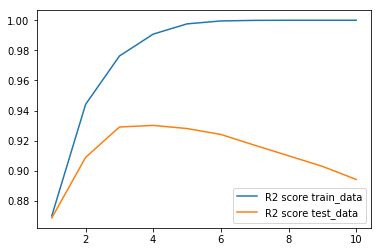

In [4]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
res = []
for i in range(1,11):
    clf = GradientBoostingRegressor(loss='ls',learning_rate=0.01,\
                                    n_estimators=1000,max_depth=i,\
                                    max_features=X_train.shape[1],random_state=2018)
    clf.fit(X_train,Y_train)
    resultat = [i,r2_score(Y_train,clf.predict(X_train)),r2_score(Y_test,clf.predict(X_test))]
    res.append(resultat)
    
r2_train = [o[1] for o in res]
r2_test = [o[2] for o in res]
axix = [o[0] for o in res]
import matplotlib.pyplot as plt
plt.plot(axix,r2_train,label="R2 score train_data")
plt.plot(axix,r2_test,label="R2 score test_data")
plt.legend(loc=4)
plt.show()

Pour max_depth entre 1 et 3, on est dans le cas de l'underfitting.<br>
On atteint le plus haut score R2 pour l'ensemble de test pour max_depth=4. <br>
Pour max_depth supérieur à 4, le score R2 diminue pour l'ensemble de test, masi augmente pour l'ensemble d'entrainement.<br>
Pour max_depht=10, on est typiquement dans un cas d'overfitting. Le score R2 de l'ensemble d'entrainement est 1 alors que celui de l'ensemble de test se situe entre 0.88 et 0.90.

# Exercice à rendre
Dans les exercices suivants, on va appliquer des modêles/algorithme de machine learning sur les données assurances.<br>
Le lien vers les données : https://www.dropbox.com/s/vatqpotujw0ibnd/insurance.csv?dl=0.<br><br>
Les colonnes de ce fichiers sont: age,	sex, bmi, children,	smoker,	region,	charges.<br>
Le butes des exercice est de prédire la variable charge en fonction des autres. Charges est donc la variable cible. Age,	sex, bmi, children,	smoker,	region constituent l'ensembles des features.<br> 
L'exercice 1 à pour but de créer un dataframe pandas à partire du fichier csv assurance. Dans les autres exercices, on utilisera le fichier  assurance.pkl:<br>
https://www.dropbox.com/s/54dqzm5wsa7b0z2/insurance.pkl?dl=0

## Exercice 1 (création du Dataframe assurance)
* Importer le fichier assurance.csv.
* Dumifier les variables qui doivent l'être
* afficher les premiere lignes du dataframe crée
* Exporter le dataframe pandas dans un pickle

## Exercice 2 (Gradient Boosting Regressor sur assurance)

1) Diviser le dataframe assurance en échantillon d'apprentissage et de test. La taille de l'échantillon de test représente 33% de la taille du dataframe assurance. On prendra pour paramêtre random_state=1998<br>
X_train,Y_train représentent l'échantillon d'apprentissage. X_test,Y_test représentent l'échantillon de test.

In [121]:
#votre code ici
import pandas as pd
rep = "/home/fabien/Bureau/Python Dauphine/DATABASE/insurance.pkl"
assurance = pd.read_pickle(rep)

2) 
* Appeller un modele du Gradient Boosting Regressor avec les parametres suivants: n_estimators=390, max_depth=4, learning_rate=0.01, random_state=2018)
* Entrainer le modêle sur X_train, et Y_train

3) Afficher le score R2, l'écart absolue moyen du modele crée précedement. Ces scores portent sur l'ensemble de test.

4) On va tracer sur un même graphique:
* le score r2 de l'ensemble d'apprentissage en fonction de max_depth, la profondeur de l'arbre
* le score r2 de l'ensemble de test en fonction de max_depth, la profondeur de l'arbre

Les autres paramêtres sont constants: n_estimators=400, learning_rate=0.01,random_state=2018

In [150]:
#votre code ici
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


## Exercice 2 (Neural network Regressor sur assurance)
1) Diviser le dataframe assurnace en échantillon d'apprentissage et de test les donnée assurance. La taille de l'échantillon de test représente 20% de la taille du dataframe assurance. On prendra pour paramêtre random_state=2003<br>
X_train,Y_train représentent l'échantillon d'apprentissage. X_test,Y_test représentent l'échantillon de test.

In [3]:
import pandas as pd
rep = "/home/fabien/Bureau/Python Dauphine/DATABASE/insurance.pkl"
assurance = pd.read_pickle(rep)

2) Créer un modele de réseau de neurone de regression avec 2 couches caché ayant respectivement 10 perceptrons dans la première couche et 10 perceptrons dans la deuxième couche.
* L'algorithme minimisant la perte sera de type newtonien. 
* Le nombre d'itération maximum est 1000
* La fonction d'activation sera relu
* La contraint L2 alpha sera la valeur par défault
* random_state=2000

Ce modele s'appelle NN1. Lancer l'apprentissage du modele (NN1.fit) sur l'ensemble d'aprentissage.

3) Calculer l'erreur moyenne absolue et le score r2 du modele NN1 sur l'ensemble de test.

4) a ) Déterminer les poids du réseau de neurone NN1 allant du neurone 3 de la couche caché 1 à l'ensemble des neurones de la couche caché 2. (En python on commence en 0)

b) Déterminer le poids allant du neurone 3 de la couche cachée 1 au neurone 5 de la couche cachée 2.

c) Déterminer les biais de la couche caché 2. On utilisera la fonction intercepts_. On a des biais uniquement dans les couches cachées

d) Déterminer le biais du perceptron 3 de la couche caché 1.

5) On pose:<br>
$\begin{eqnarray*}
N_{i} &=& \mbox{number of input neurons}\\
N_{o} &=& \mbox{number of output neurons}\\
N_{s} &=& \mbox{number of samples in training data}\\
\alpha &=& \mbox{an arbitrary scaling factor usually 2-10.}\\
N_{h} &=& \frac{N_{s}}{(\alpha (N_{i}+N_{o}))} \mbox{upper bound on the number of hidden neurons that won't result in over-fitting}.
\end{eqnarray*}$<br><br>
<b>Calculer $N_{h}$ pour $\alpha = 5$. Afficher $N_{h}$ <b>

6) Utiliser gridsearch cv pour faire une validation croisé de type 5 fold cross validation dans le bute d'optimiser le score r2.<br>
Cette validation croisé sera faites sur des réseaux de neurones à 2 couches cachées.<br>
Le nombre de perceptron de chaque couche va de 11 à 19.<br>
On prendra random_state=2000, activation='relu' et solver='lbfgs', max_iter = 800.<br>
Afficher ensuite dans une autre cellule le meilleur score de votre gridsearchcv.<br>
Affiche dans une autre cellule les meilleurs paramêtres.

7) Faire un algorithme de réseaux de neurone NN_best avec les meilleurs parametres determinés à la question 6. Lancer l'apprentissage sur X_train et Y_train.

8) Calculer les score r2 de NN_best sur les données de test et afficher ce dernier.

## Exercice 3 (Epsilon-Support Vector Regression sur le dataframe assurance)
1) Diviser le dataframe assurance en échantillon d'apprentissage et de test les donnée assurance. La taille de l'échantillon de test représente 20% de la taille du dataframe assurance. On prendra pour paramêtre random_state=2003<br>
X_train,Y_train représentent l'échantillon d'apprentissage. X_test,Y_test représentent l'échantillon de test.

2) Scaler les donner X_train et X_test. Les résultats serons stocker dans X_train_scal et Y_train_scal.

3) Utiliser un Epsilon-Support Vector Regression avec comme parametre kernel='linear',C=200, epsilon=1, gamma=0.08. On appelera ce modele SVMR. Entrainez SVRM sur X_train et Y_train.

4) Calculer le score r2 des données de test scalées et afficher ce dernier.

5) Utiliser un Epsilon-Support Vector Regression avec comme paramêtre kernel='poly',C=800, epsilon=1, degree=3. On appelera ce modêle SVMRPOLY.

4) On va tracer sur un même graphique:
* le score r2 d'un SVR sur l'ensemble d'apprentissage en fonction du degree du polynome 
* le score r2 du même SVR l'ensemble de test en fonction du degree du polynome 

Les autres paramêtres sont constants: kernel='poly', C=800, epsilon=1.

## Exercice 4 (RandomForestRegressor)
Utilisez la fonctionalité gridsearchcv sur des RandomForestRegressor pour prédire au mieux la variable charge.<br>
Vous devrez donc trouver le meilleur algorithme possible de random forest au sens du score r2.<br>
Indication sur la grille des parametre:<br>
parameters = {'n_estimators':list(range(20,80)),'max_depth':list(range(3,15)),
              'max_features':list(range(5,12))}